In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [231]:
dados = pd.read_csv(r"C:\Users\Lucas\Desktop\FIAP\Fase 2\TechChallenge_2\data\Ibovespa_2015-2025.csv", sep=',')

In [232]:
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.07.2025,139.549,138.855,139.695,138.855,"6,35B","0,50%"
1,30.06.2025,138.855,136.865,139.103,136.430,"7,68B","1,45%"
2,27.06.2025,136.866,137.113,137.209,136.469,"6,24B","-0,18%"
3,26.06.2025,137.114,135.767,137.353,135.756,"8,02B","0,99%"
4,25.06.2025,135.767,137.163,137.163,135.565,"7,71B","-1,02%"


In [233]:
dados.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2597,08.01.2015,49.943,49.463,50.261,49.017,"3,62M","0,97%"
2598,07.01.2015,49.463,48.006,49.882,48.006,"4,41M","3,05%"
2599,06.01.2015,48.001,47.517,48.061,47.338,"4,56M","1,02%"
2600,05.01.2015,47.517,48.512,48.512,47.264,"3,87M","-2,05%"
2601,02.01.2015,48.512,50.004,50.004,48.345,"2,88M","-2,99%"


In [234]:
dados.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [235]:
# Filtra o DataFrame para mostrar apenas as linhas que contêm QUALQUER valor nulo
linhas_com_nulos = dados[dados.isnull().any(axis=1)]

print(linhas_com_nulos)

            Data  Último  Abertura  Máxima  Mínima Vol.    Var%
2331  10.02.2016  40.377    40.592  40.592   39.96  NaN  -0,53%


In [236]:
dados = dados.dropna()

In [237]:
dados.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [238]:
dados.shape

(2601, 7)

In [239]:
dados.describe().round(2)

,Último,Abertura,Máxima,Mínima
count,2601.00,2601.00,2601.00,2601.00
mean,94.03,93.99,94.83,93.19
std,27.64,27.64,27.76,27.53
min,37.50,37.50,38.03,37.05
25%,68.53,68.47,69.05,67.87
50%,101.20,101.20,102.18,100.16
75%,116.81,116.78,117.86,115.84
max,140.11,140.11,140.38,138.97


In [240]:
dados['Data'] = dados['Data'].str.replace(".","/")
dados['Data'] = pd.to_datetime(dados['Data'], format='%d/%m/%Y')

In [241]:
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-07-01,139.549,138.855,139.695,138.855,"6,35B","0,50%"
1,2025-06-30,138.855,136.865,139.103,136.430,"7,68B","1,45%"
2,2025-06-27,136.866,137.113,137.209,136.469,"6,24B","-0,18%"
3,2025-06-26,137.114,135.767,137.353,135.756,"8,02B","0,99%"
4,2025-06-25,135.767,137.163,137.163,135.565,"7,71B","-1,02%"


In [242]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 0 to 2601
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      2601 non-null   datetime64[ns]
 1   Último    2601 non-null   float64       
 2   Abertura  2601 non-null   float64       
 3   Máxima    2601 non-null   float64       
 4   Mínima    2601 non-null   float64       
 5   Vol.      2601 non-null   object        
 6   Var%      2601 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 162.6+ KB


In [243]:
#dados['Vol.'] = dados['Vol.'].str.replace('M','')
dados['Vol.'] = dados['Vol.'].str.replace(',','.')

def converter_volume(valor):
    
    #valor = valor.str.replace(',','.')
    """
    Converte uma string com sufixos (K, M) para um valor numérico (float).
    """
    # Verifica se o valor é uma string antes de tentar manipulá-lo
    if isinstance(valor, str):
        valor_upper = valor.upper() # Usa uma variável para padronizar
        if 'M' in valor_upper:
            # Remove o 'M' e multiplica por 1,000,000
            return float(valor_upper.replace('M', '')) * 1_000_000
        elif 'K' in valor_upper:
            # Remove o 'K' e multiplica por 1,000
            return float(valor_upper.replace('K', '')) * 1_000
        elif 'B':
            # Remove o 'B' e multiplica por 1,000,000,000
            return float(valor_upper.replace('B', '')) * 1_000_000_000
            
    # Para valores que já são números ou podem ser convertidos diretamente
    # Retorna NaN para qualquer outra string que não se encaixe (ex: '-')
    return pd.to_numeric(valor, errors='coerce')


dados['Vol.'] = dados['Vol.'].apply(converter_volume)

In [244]:
dados['Vol.']

0       6.350000e+09
1       7.680000e+09
2       6.240000e+09
3       8.020000e+09
4       7.710000e+09
            ...     
2597    3.620000e+06
2598    4.410000e+06
2599    4.560000e+06
2600    3.870000e+06
2601    2.880000e+06
Name: Vol., Length: 2601, dtype: float64

In [245]:
dados['Var%'] = dados['Var%'].str.replace("%","")
dados['Var%'] = dados['Var%'].str.replace(",",".")
dados['Var%'] = dados['Var%'].astype(float)

In [246]:
dados.columns = ["data","ultimo","abertura","maxima","minima", "volume", "variacao_porcento"]
dados_ordenados_por_data = dados.sort_values(by='data', ascending=False)
dados_ordenados_por_data

,data,ultimo,abertura,maxima,minima,volume,variacao_porcento
0,2025-07-01,139.549,138.855,139.695,138.855,6.350000e+09,0.50
1,2025-06-30,138.855,136.865,139.103,136.430,7.680000e+09,1.45
2,2025-06-27,136.866,137.113,137.209,136.469,6.240000e+09,-0.18
3,2025-06-26,137.114,135.767,137.353,135.756,8.020000e+09,0.99
4,2025-06-25,135.767,137.163,137.163,135.565,7.710000e+09,-1.02
...,...,...,...,...,...,...,...
2597,2015-01-08,49.943,49.463,50.261,49.017,3.620000e+06,0.97
2598,2015-01-07,49.463,48.006,49.882,48.006,4.410000e+06,3.05
2599,2015-01-06,48.001,47.517,48.061,47.338,4.560000e+06,1.02
2600,2015-01-05,47.517,48.512,48.512,47.264,3.870000e+06,-2.05


In [247]:
dados['status_fechamento'] = (dados['ultimo'].shift(-1) < dados['ultimo']).astype(int)
dados.head(10)

,data,ultimo,abertura,maxima,minima,volume,variacao_porcento,status_fechamento
0,2025-07-01,139.549,138.855,139.695,138.855,6.350000e+09,0.50,1
1,2025-06-30,138.855,136.865,139.103,136.430,7.680000e+09,1.45,1
2,2025-06-27,136.866,137.113,137.209,136.469,6.240000e+09,-0.18,0
3,2025-06-26,137.114,135.767,137.353,135.756,8.020000e+09,0.99,1
4,2025-06-25,135.767,137.163,137.163,135.565,7.710000e+09,-1.02,0
5,2025-06-24,137.165,136.552,138.156,136.254,8.080000e+09,0.45,1
6,2025-06-23,136.551,137.116,137.130,135.835,7.730000e+09,-0.41,0
7,2025-06-20,137.116,138.715,138.719,136.815,1.129000e+10,-1.15,0
8,2025-06-18,138.717,138.844,139.161,138.443,8.320000e+09,-0.09,0
9,2025-06-17,138.840,139.256,139.497,138.293,8.380000e+09,-0.30,0


{'whiskers': [<matplotlib.lines.Line2D at 0x19a1614afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a1614bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a1614ae90>],
 'medians': [<matplotlib.lines.Line2D at 0x19a1614b390>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a1614b4d0>],
 'means': []}

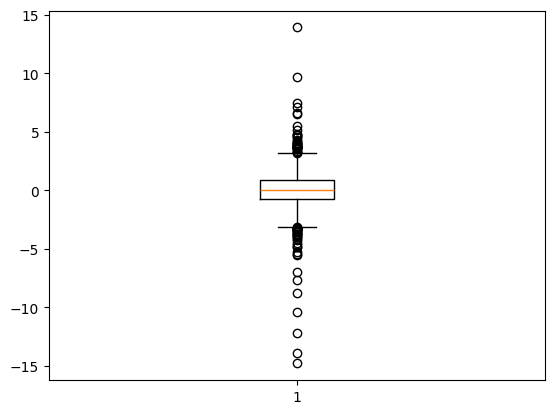

In [248]:
plt.boxplot(dados['variacao_porcento'])

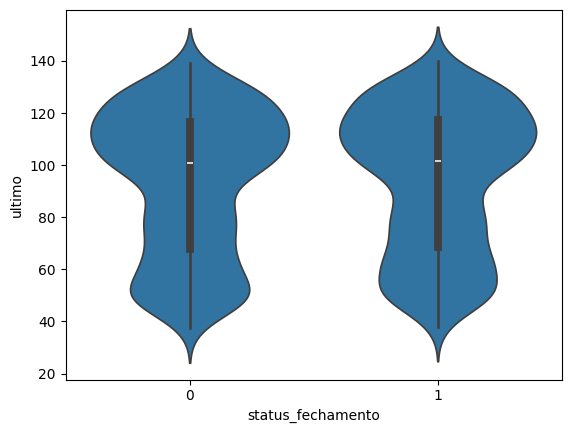

In [249]:
sns.violinplot(x='status_fechamento', y='ultimo', data=dados)
plt.show()

<Axes: xlabel='status_fechamento', ylabel='count'>

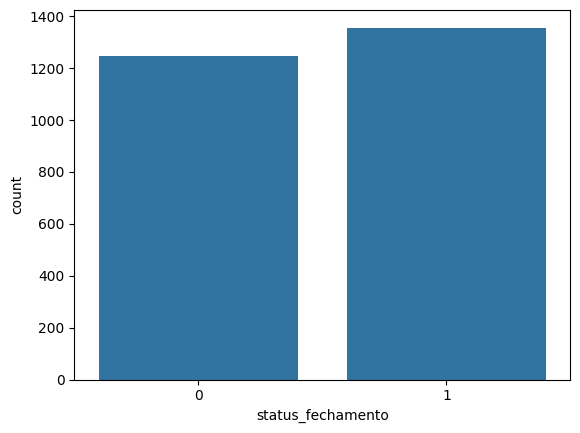

In [250]:
sns.countplot(x='status_fechamento',data=dados)


In [251]:
# 1. Crie novas colunas numéricas a partir da data
dados['ano'] = dados['data'].dt.year
dados['mes'] = dados['data'].dt.month
dados['dia'] = dados['data'].dt.day
dados['dia_da_semana'] = dados['data'].dt.dayofweek # Segunda=0, Domingo=6

# 2. Remova a coluna original de data, que não é mais necessária
dados = dados.sort_values(by=['data'])
dados = dados.drop('data', axis=1)


In [252]:
dados.columns

Index(['ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao_porcento',
       'status_fechamento', 'ano', 'mes', 'dia', 'dia_da_semana'],
      dtype='object')

In [253]:
dados['volume'].isnull().sum()

np.int64(0)

In [254]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 2601 to 0
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ultimo             2601 non-null   float64
 1   abertura           2601 non-null   float64
 2   maxima             2601 non-null   float64
 3   minima             2601 non-null   float64
 4   volume             2601 non-null   float64
 5   variacao_porcento  2601 non-null   float64
 6   status_fechamento  2601 non-null   int64  
 7   ano                2601 non-null   int32  
 8   mes                2601 non-null   int32  
 9   dia                2601 non-null   int32  
 10  dia_da_semana      2601 non-null   int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 203.2 KB


<Axes: >

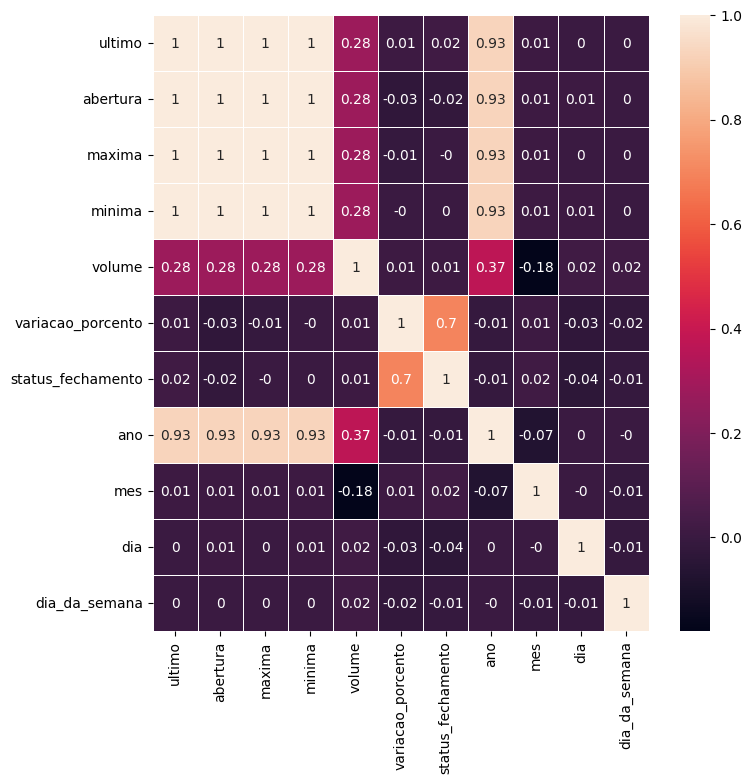

In [255]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [256]:
print(dados.isnull().sum())

ultimo               0
abertura             0
maxima               0
minima               0
volume               0
variacao_porcento    0
status_fechamento    0
ano                  0
mes                  0
dia                  0
dia_da_semana        0
dtype: int64


##Teste sem feeturing Scaller

In [ ]:
x = dados[['ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao_porcento','ano', 'mes', 'dia', 'dia_da_semana']]
y = dados['status_fechamento']


#Dados separados com train test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101) #0.012

#Dados dos últimos 30 dias 

x_train_ultimo_mes, x_test_ultimo_mes = x[:-30], x[-30:]
y_train_ultimo_mes, y_test_ultimo_mes = y[:-30], y[-30:]


#Escalonamento dos dados

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Realizando o escalonamento dos dados separados com train test split
scaler = StandardScaler()
scaler.fit(x_train)
x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

#Realizando o escalonamento dos dados dos últimos 30 dias 

scaler = StandardScaler()
scaler.fit(x_train_ultimo_mes)
x_train_ultimo_mes_escalonado = scaler.transform(x_train_ultimo_mes)
x_test_ultimo_mes_escalonado = scaler.transform(x_test_ultimo_mes)



# KNN

## Teste sem escalonamento de dados

In [ ]:
#Teste com Dados separados com train test split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_true= y_test, y_pred=y_pred)
print("Accuracy: ", round(accuracy,2))

Accuracy:  0.51


In [ ]:
#Teste com Dados dos últimos 30 dias 

knn_2 = KNeighborsClassifier(n_neighbors=3)

knn_2.fit(x_train_ultimo_mes,y_train_ultimo_mes)

y_pred_ultimo_mes = knn_2.predict(x_test_ultimo_mes)
accuracy = accuracy_score(y_true=y_test_ultimo_mes,y_pred=y_pred_ultimo_mes)
print("Accuracy: ", round(accuracy,2))

Accuracy:  0.6


TESTE DE ACCURACY COM BASE 90/10 = 0.49

TESTE DE ACURACY COM BASE 80/20 = 0.51

## Teste com escalonamento de dados 

In [ ]:
# Encontrando o número de K com menor diferença na média de erro
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

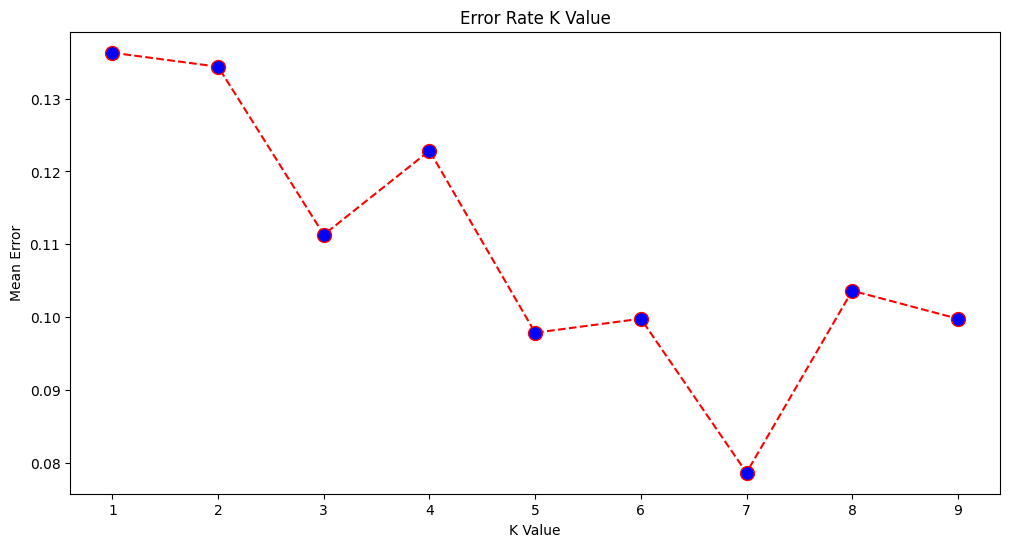

In [321]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color='red', linestyle='dashed', marker='o', markerfacecolor="blue", markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [379]:
# Teste com Train Teste Split

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_escalonado, y_train)

y_pred = knn.predict(x_test_escalonado)

accuracy = accuracy_score(y_true= y_test, y_pred=y_pred)
print("Accuracy: ", round(accuracy,2))

Accuracy:  0.92


In [380]:
# Testando com os últimos 30 dias na base de teste

knn_2 = KNeighborsClassifier(n_neighbors=7)
knn_2.fit(x_train_ultimo_mes_escalonado , y_train_ultimo_mes)

y_pred = knn_2.predict(x_test_ultimo_mes_escalonado )

accuracy = accuracy_score(y_true=y_test_ultimo_mes, y_pred=y_pred)
print("Accuracy: ", round(accuracy,2))

Accuracy:  0.6


# SVM

In [366]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [378]:
svm = Pipeline(
    [
        ("linear_svc", LinearSVC(C=1)) # C é a margem de separação dos dados
    ]
)

## Teste sem escalonamento de dados

In [376]:
# Teste com Train Teste Split
svm.fit(x_train,y_train)
y_predito_svm = svm.predict(x_test)
print(accuracy_score(y_test,y_predito_svm))

0.5028790786948176


In [377]:
# Testando com os últimos 30 dias na base de teste
svm.fit(x_train_ultimo_mes, y_train_ultimo_mes)
y_pred_svm = svm.predict(x_test_ultimo_mes)
print(accuracy_score(y_test_ultimo_mes,y_pred_svm))

0.43333333333333335


## Teste com escalonamento de dados 

In [ ]:
# Teste com Train Teste Split Escalonado

svm.fit(x_train_escalonado, y_train)

y_predito_svm = svm.predict(x_test_escalonado)

print(accuracy_score(y_test,y_predito_svm))

1.0


In [ ]:
# Testando com os últimos 30 dias na base de teste escalonado

svm.fit(x_train_ultimo_mes_escalonado, y_train_ultimo_mes)

y_predito_svm = svm.predict(x_test_ultimo_mes_escalonado)

print(accuracy_score(y_test_ultimo_mes,y_predito_svm))

1.0
